# ***Ahmed Mostafa Attia***

In [1]:
import sqlite3
import pandas as pd

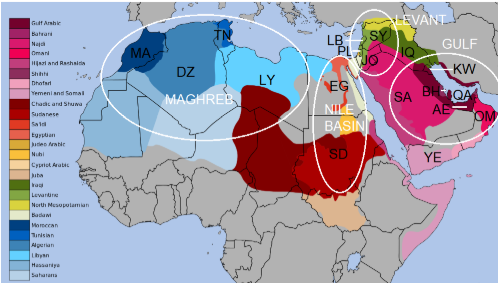

Let's Fetch the data

In [ ]:
# conn = sqlite3.connect('/content/dialects_database.db')



# # Get the list of all tables
# query = "SELECT name FROM sqlite_master WHERE type='table';"
# tables = pd.read_sql_query(query, conn)

# # Initialize an empty list to hold the data from each table
# all_data = []

# # Fetch data from each table and append it to the list
# for table in tables['name']:
#     query = f"SELECT * FROM {table}"
#     df = pd.read_sql_query(query, conn)
#     all_data.append(df)

# # Concatenate all data into a single DataFrame
# combined_df = pd.concat(all_data, ignore_index=True)

# # Close the connection
# conn.close()

# # Display the first few rows of the combined dataframe
# print(combined_df.head())
# print(f"Total rows: {combined_df.shape[0]}, Total columns: {combined_df.shape[1]}")

In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database /content/drive/MyDrive/dialects_database.db
conn = sqlite3.connect('/content/drive/MyDrive/dialects_database.db')
cursor = conn.cursor()

# Get a list of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Initialize an empty list to store data from each table
all_data = []

# Iterate over each table
for table in tables:
    table_name = table[0]

    # Fetch all column names for the current table
    cursor.execute(f"PRAGMA table_info('{table_name}')")
    columns = cursor.fetchall()
    column_names = [col[1] for col in columns]

    # Fetch all rows for the current table
    cursor.execute(f"SELECT * FROM {table_name}")
    rows = cursor.fetchall()

    # Convert rows into a DataFrame
    df = pd.DataFrame(rows, columns=column_names)

    # Append the DataFrame to the list
    all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(all_data, axis=1)

# Close the database connection
conn.close()

# Display the merged DataFrame
print(merged_df)


                         id  \
0       1009754958479151232   
1       1009794751548313600   
2       1019989115490787200   
3       1035479791758135168   
4       1035481122921164800   
...                     ...   
147720   982775354405376000   
147721   980728852224860160   
147722   975502734668500992   
147723   980207908641263616   
147724   981080482380238848   

                                                     text  \
0       @toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...   
1       @AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...   
2       @smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...   
3       @AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...   
4       @lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...   
...                                                   ...   
147720  الناس دي بتنفخ في قربة مقدودة بالدارجي كده  ال...   
147721  @Wail_Hamza @amiromer انت عايش وين بره السودان...   
147722  مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وا...   
147723  ياخي ديل 

In [3]:
merged_df.head(10)

,id,text,id,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,1009754958479151232,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,1009794751548313600,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,1019989115490787200,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,1035479791758135168,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,1035481122921164800,LY
5,877881537122979840,@alibobkr63 او حتى من اي دين او طائفة. اسف ممك...,877881537122979840,LY
6,882940840888471552,@muhamed01111 باهي نستنوه. بلكي مشغول ولا حاجة,882940840888471552,LY
7,882941769444466688,@muhamed01111 مهما اختلفنا راه نحنا خوت. والله...,882941769444466688,LY
8,882943694906818560,@muhamed01111 بالنسبة ليا انا والله شبعت هم ون...,882943694906818560,LY
9,884736569118261248,@Ajo32asLibya @Jed_ly مو نحنا الحياة عندنا مية...,884736569118261248,LY


In [4]:
merged_df = merged_df.drop(columns=['id'])


In [5]:
df = merged_df
df

,text,dialect
0,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
3,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
4,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY
...,...,...
147720,الناس دي بتنفخ في قربة مقدودة بالدارجي كده ال...,SD
147721,@Wail_Hamza @amiromer انت عايش وين بره السودان...,SD
147722,مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وا...,SD
147723,ياخي ديل ماخلو للشيطان وإبليس شي لكن يروحو وي...,SD


In [6]:
def is_dataframe(data):
    return isinstance(data, pd.DataFrame)

print(is_dataframe(df))  # Output: True


True


In [7]:
df.to_csv('ArabicTweetsCleaned.csv', index=False)


# -> Here We Go With Data

In [8]:
data = pd.read_csv(r'/content/ArabicTweetsCleaned.csv', lineterminator="\n")
data.head(3)

,text,dialect
0,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY


# This is Data Fetching Notebook !